In [ ]:
!pip install haversine
!pip install geopy
!pip install spacy
!pip install -U sentence-transformers

In [ ]:
import pandas as pd #Used to hold the data and perform different sql operations.
import numpy as np #Used to store arrays and perform operations on it.
import matplotlib.pyplot as plt #Used for Visualisation of graphs and plots.
import seaborn as sns #Used for better visualisation and plots.
import haversine as hs #The Haversine (or great circle) distance is the angular distance between two points on the surface of a sphere. The first coordinate of each point is assumed to be the latitude, the second is the longitude, given in radians.
from geopy.geocoders import Nominatim #Nominatim uses OpenStreetMap data to find locations on Earth by name and address (geocoding).
import nltk # Used for NLP Processing
import string #Used for using string functions
from nltk.corpus import stopwords #Getting the list of stopwords
nltk.download('stopwords') #Downloading the stopwords
from sklearn.cluster import KMeans

from sentence_transformers import SentenceTransformer, util
model = SentenceTransformer('all-MiniLM-L12-v2')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/573 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/134M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/352 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [ ]:
#Importing the Dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/food_recommend_fiver/zomato.csv')

# **Data Understanding**

url: url of that restaurants w.r.t zomato

address: address of that restaurants

name: stores the name of restaurants

online_order: indicates whether online ordering is available in the restaurant or not

book_table: indicates whether table booking option available or not

rate: contains the overall rating of the restaurant out of 5

votes: contains total number of rating for the restaurant as of a particular date

phone: stores the contact number of restaurants

location: contains the neighborhood in which the restaurant is located

rest_type: indicates the category of restaurant

dish_liked: dishes people liked in the restaurant

cuisines: stores the type of cuisines served by the restaurant

approx_cost(for two people): contains the cost for two people

reviews_list: contains different reviews given to the restaurants

menu_item: contains list of menus available in the restaurant

listed_in(type): stores the type of meal

listed_in(city): contains the neighborhood in which the restaurant is listed

In [ ]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [ ]:
df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


# **Data Preprocessing**

In [ ]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [ ]:
#Dropping Columns not Important
df.drop(['url','phone', 'menu_item', 'listed_in(city)','dish_liked','votes','book_table','online_order','address','rest_type'],axis=1,inplace=True)

In [ ]:
#Renaming the Columns
df.rename(columns={'rate':'ratings','approx_cost(for two people)':'approx_cost_for_two_people','name':'restaurant_name'},inplace=True)

In [ ]:
#Check for duplicated data
df[df.duplicated()]

,restaurant_name,ratings,location,cuisines,approx_cost_for_two_people,reviews_list,listed_in(type)
596,My Tea House,NEW,Banashankari,"Continental, Asian, North Indian, Tea",500,"[('Rated 4.0', ""RATED\n So apparently I visit...",Dine-out
2235,Shiv Sagar,3.6/5,Bannerghatta Road,"South Indian, Beverages",400,"[('Rated 4.0', 'RATED\n It was yesterday I vi...",Dine-out
2482,Grand Village,3.8/5,Basavanagudi,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",Buffet
2483,Timepass Dinner,3.8/5,Basavanagudi,North Indian,600,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",Buffet
2490,San Churro Cafe,3.8/5,Banashankari,"Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",Buffet
...,...,...,...,...,...,...,...
51634,Venice Kerala Restaurant,3.7 /5,Brookefield,Kerala,200,"[('Rated 5.0', 'RATED\n Loved this restaurant...",Dine-out
51637,The Crunch,3.3 /5,Brookefield,Beverages,300,"[('Rated 3.0', 'RATED\n the sandwich was not ...",Dine-out
51639,Kale Cafe,NaN,Brookefield,"Fast Food, Kerala",100,[],Dine-out
51642,Basaveshwara Khanavali,NaN,Brookefield,South Indian,200,[],Dine-out


In [ ]:
#Dropping the duplicates as they are of no use
df.drop_duplicates(inplace=True)

In [ ]:
def filter_rate(str_rate): #Function to pre-process ratings into a float format
    if (str_rate=='-') or (str_rate=='NEW'): # Here, I am getting rid of the unwanted values in the ratings column
        return np.nan
    else:
        str_rate=str(str_rate).split('/')[0] # e.g 4.3/5 -> ['4.3', '5'] -> float(4.3) -> 4.3
    return float(str_rate)

In [ ]:
df['ratings'] = df['ratings'].apply(filter_rate) #applying the filter rate function

In [ ]:
df['approx_cost_for_two_people'] = df['approx_cost_for_two_people'].str.replace(',', '').astype(float) #Preprocess the cost from string to float format

In [ ]:
df.dropna(subset=['location','cuisines','ratings'],inplace=True) #Dropping the NA Values

In [ ]:
df.isnull().sum()

restaurant_name                 0
ratings                         0
location                        0
cuisines                        0
approx_cost_for_two_people    192
reviews_list                    0
listed_in(type)                 0
dtype: int64

In [ ]:
grouped_by_ratings = df.groupby('restaurant_name')['restaurant_name','ratings'].mean() #Calculating the mean of the ratings for each unique restaurant
df['mean_rating'] = 0

for index, row in grouped_by_ratings.iterrows():
    df['mean_rating'][df['restaurant_name'] == index] = row['ratings'] #Assigning the mean ratings to the respected restaurants

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
df['mean_rating'] = df['mean_rating'].round(2)

In [ ]:
df.describe()

,ratings,approx_cost_for_two_people,mean_rating
count,31959.000000,31767.000000,31959.000000
mean,3.728142,629.805396,3.728180
std,0.455428,474.117973,0.431527
min,1.800000,40.000000,1.800000
25%,3.400000,300.000000,3.430000
50%,3.800000,500.000000,3.730000
75%,4.100000,800.000000,4.020000
max,4.900000,6000.000000,4.900000


# **EDA**

In [ ]:
df['restaurant_name'].nunique()

6645

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 131 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 130 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 131 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 130 missing from current font.
  font.set_t

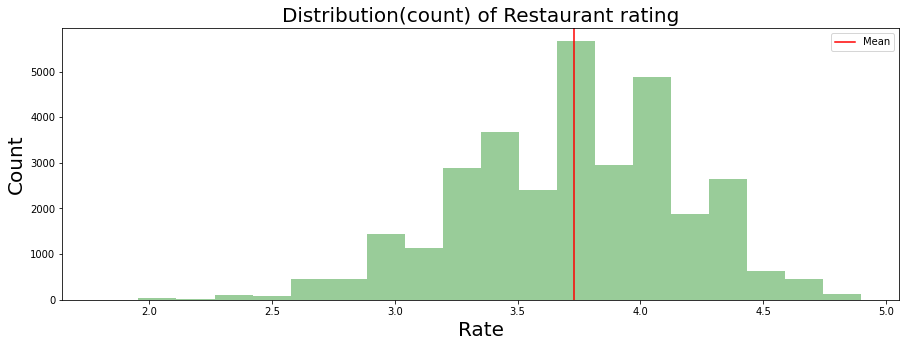

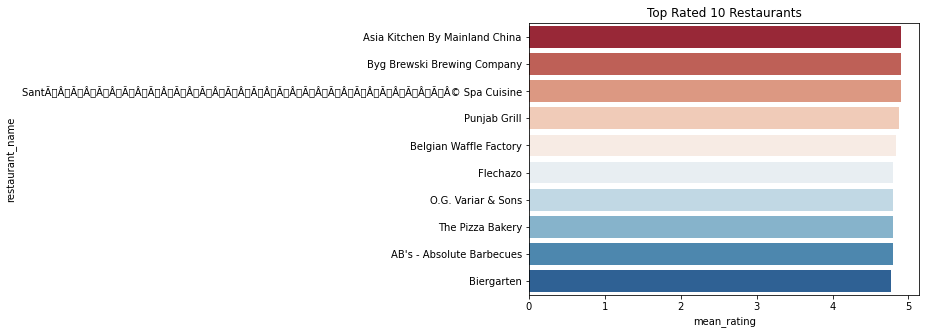

In [ ]:
#Distribution of Restaurant Rating 
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))
sns.distplot(df.ratings,kde=False,color = 'g',ax =ax,bins=20);
ax.axvline(df.ratings.mean(), 0, 1, color='r', label='Mean')
ax.legend();
ax.set_ylabel('Count',size=20)
ax.set_xlabel('Rate',size=20)
ax.set_title('Distribution(count) of Restaurant rating',size=20);
# Top 10 Rated Restaurants
df_rating = df.drop_duplicates(subset='restaurant_name')
df_rating = df_rating.sort_values(by='mean_rating', ascending=False).head(10)
plt.figure(figsize=(7,5))
sns.barplot(data=df_rating, x='mean_rating', y='restaurant_name', palette='RdBu')
plt.title('Top Rated 10 Restaurants');

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


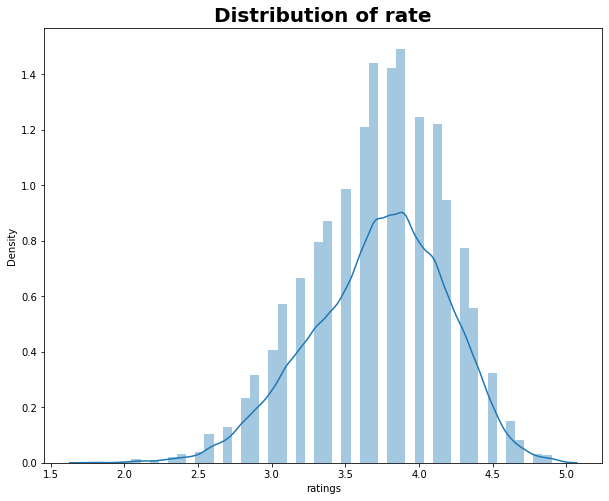

In [ ]:
plt.figure(figsize = (10, 8))
sns.distplot(df['ratings'])
plt.title("Distribution of rate", fontsize=20, fontweight='bold')
plt.show()

# **Restaurants Recommendations**

In [ ]:
def get_unique_cuisine_dict(df): #Function to get the unique restaurants with their mean rating, cuisines and location.
    unique_cuisines_for_each_rest = {}
    #Get all Unique Restaurants
    unique_restaurants = df['restaurant_name'].unique()
    for unique_rest in unique_restaurants:
        list_of_unique_cuisines=[]
        list_of_feat=[]
        for list_of_cuisines in list(df[df['restaurant_name'] == unique_rest]['cuisines']): #Loop for to get the cuisines from all the time periods for each restaurant
            list_of_cuisines = [cuisine.strip() for cuisine in list_of_cuisines.split(',')]
            list_of_unique_cuisines = list_of_unique_cuisines + list_of_cuisines
        list_of_unique_cuisines = list(set(list_of_unique_cuisines)) #To get the unique cuisines for each unique restaurant
        list_of_feat.append(df[df['restaurant_name'] == unique_rest]['mean_rating'].iloc[0]) #Appending the mean rating for unique restaurant
        list_of_feat.append(list_of_unique_cuisines) #Appending the unique cuisines for unique restaurant
        list_of_feat.append(df[df['restaurant_name'] == unique_rest]['location'].iloc[0]) #To get the location of unique restaurant.
        unique_cuisines_for_each_rest[unique_rest] = list_of_feat
    return unique_cuisines_for_each_rest

In [ ]:
def prepare_location(df): #Function to get unique location/address 
    unique_locations = list(df['location'].unique())
    locations = pd.DataFrame(unique_locations,columns=['location'])
    locations['full_location'] = locations['location'] + ', Bangalore, Karnataka, India'
    return locations

In [ ]:
def calculate_rest_geo_location(locations,geolocator): #Function to Calculate the geo-locations - Latitude and Longitude
    lat_lon=[]
    for location in locations['full_location']:
        location = geolocator.geocode(location)
        if location is None:
            lat_lon.append(np.nan)
        else:    
            geo=(location.latitude,location.longitude)
            lat_lon.append(geo)
    locations['lat_lon'] = lat_lon
    return locations

In [ ]:
def calculate_user_geo_location(location,geolocator):#Function to Calculate the geo-locations - Latitude and Longitude for input user location
    location = geolocator.geocode(location)
    if location is None:
        return np.nan
    else:
        geo = (location.latitude,location.longitude)
        return geo

In [ ]:
def get_overall_unique_cuisines(unique_cuisines_for_each_rest): #Get Unique Cuisines over all the restaurants
    list_of_overall_unique_cuisines=[]
    for key,value in unique_cuisines_for_each_rest.items():
        list_of_overall_unique_cuisines = list_of_overall_unique_cuisines + value[1]
    list_of_overall_unique_cuisines  = list(set(list_of_overall_unique_cuisines))
    return list_of_overall_unique_cuisines

In [ ]:
def get_similar_cuisine(model,ic,list_of_overall_unique_cuisines):#Using Transformer to get the similar existing cuisines based on the input cuisines
    cuis_score_df=pd.DataFrame(columns=['cuisines','scores'])
    for cuis in list_of_overall_unique_cuisines:
        cuis_score_dict={}
        ic_vector = model.encode(ic)
        cuis_vector = model.encode(cuis)
        score = util.cos_sim(ic_vector,cuis_vector)
        cuis_score_dict['cuisines'] = cuis
        cuis_score_dict['scores'] = float(score)
        cuis_score_df = cuis_score_df.append(cuis_score_dict,ignore_index=True)
    cuis_score_df = cuis_score_df[cuis_score_df['scores'] > 0.45]
    #cuis_score_df.sort_values(by='scores',ascending=False,inplace=True)
    if not cuis_score_df.empty:
        return list(cuis_score_df['cuisines'].values)
    else:
        return None

In [ ]:
def find_existing_cuisines_from_input(input_cuisines,model,list_of_overall_unique_cuisines): #find existing cuisines, new cuisines and process them accordingly
    list_find_cuisines_for = []
    cuis_to_be_added = []
    for ic in input_cuisines:
        if ic not in list_of_overall_unique_cuisines:
            list_find_cuisines_for.append(ic)
            found_cuis = get_similar_cuisine(model,ic,list_of_overall_unique_cuisines)

            if not(found_cuis is None):
                cuis_to_be_added = cuis_to_be_added + found_cuis
    input_cuisines = [ic for ic in input_cuisines if ic not in list_find_cuisines_for]
    if len(cuis_to_be_added) != 0:
        input_cuisines = input_cuisines + cuis_to_be_added
    input_cuisines = list(set(input_cuisines))
    return input_cuisines

In [ ]:
def recommend(unique_cuisines_for_each_rest,input): #Recommending restaurants based on cuisines and ratings
    input_cuisines = input[0]
    input_cuisines = [cuisine.lower() for cuisine in input_cuisines]
    df_recommends=pd.DataFrame(columns=['restaurant','restaurant_ratings','present_cuisines_count','present_cuisines'])
    for rest,values in unique_cuisines_for_each_rest.items():
        recommend_rest_dict={}
        rest_cuisines = [cuisine.lower() for cuisine in values[1]]
        present_cuisines = [cuisine for cuisine in input_cuisines if cuisine in rest_cuisines] #Get only the cuisines from the restaurant which is in input list of cuisines
        present_cuisines_count = len(present_cuisines)
        if (present_cuisines_count > 0) and (values[0] >= 3.5): # Recommending restaurants which contains cuisines > 0 and ratings >= 3.5
            recommend_rest_dict['restaurant'] = rest
            recommend_rest_dict['present_cuisines_count'] = present_cuisines_count
            recommend_rest_dict['present_cuisines'] = present_cuisines
            recommend_rest_dict['restaurant_ratings'] = values[0]
            recommend_rest_dict['location'] = values[2]
            df_recommends = df_recommends.append(recommend_rest_dict,ignore_index=True)
    df_recommends.sort_values(by=['present_cuisines_count'],ascending=False,inplace=True)
    return df_recommends

In [ ]:
def recommend_nearest_restaurants(locations_with_rest_coor,df_recommends,input_location_coor,k_model): #Recommend restaurants based on the distance neares to the user location
    list_of_dist = []
    input_loc_cluster = k_model.predict([[input_location_coor[0],input_location_coor[1]]])[0]
    locations_with_rest_coor_clus = locations_with_rest_coor[locations_with_rest_coor['cluster'] == input_loc_cluster]
    df_recommends[df_recommends['location'].apply(lambda x: True if x in locations_with_rest_coor_clus['location'] else False)]
    return df_recommends

In [ ]:
def prepare_features_for_k_means(lat_lon):
    lat=[]
    lon=[]
    for tup in lat_lon:
        if isinstance(tup,tuple):
            lat.append(tup[0])
            lon.append(tup[1])
        else:
            lat.append(np.nan)
            lon.append(np.nan)
    return lat,lon

In [ ]:
unique_cuisines_for_each_rest = get_unique_cuisine_dict(df)
locations = prepare_location(df)

In [ ]:
geolocator=Nominatim(user_agent="app")
locations_with_rest_coor = calculate_rest_geo_location(locations,geolocator)

In [ ]:
locations_with_rest_coor.dropna(subset=['lat_lon'],inplace=True)

In [ ]:
locations_with_rest_coor = pd.read_csv('/content/locations_with_rest_coor.csv')

In [ ]:
locations_with_rest_coor.head()

,location,full_location,lat_lon,lat,lon,cluster
0,Banashankari,"Banashankari, Bangalore, Karnataka, India","(12.965283249999999, 77.59445195)",12.965283,77.594452,0
1,Basavanagudi,"Basavanagudi, Bangalore, Karnataka, India","(12.9417261, 77.5755021)",12.941726,77.575502,3
2,Mysore Road,"Mysore Road, Bangalore, Karnataka, India","(12.9467026, 77.5300705)",12.946703,77.530070,5
3,Jayanagar,"Jayanagar, Bangalore, Karnataka, India","(12.9292731, 77.5824229)",12.929273,77.582423,3
4,Kumaraswamy Layout,"Kumaraswamy Layout, Bangalore, Karnataka, India","(12.9081487, 77.5553179)",12.908149,77.555318,3


In [ ]:
list_of_overall_unique_cuisines = get_overall_unique_cuisines(unique_cuisines_for_each_rest)

In [ ]:
locations_with_rest_coor['lat'],locations_with_rest_coor['lon'] = prepare_features_for_k_means(locations_with_rest_coor.lat_lon)

In [ ]:
#Creating models for k from 2 to 14
inertia = []
for k in range(2,15):
    k_model = KMeans(n_clusters=k, random_state=12).fit(locations_with_rest_coor[['lat','lon']])
    inertia.append(k_model.inertia_)

Text(0, 0.5, 'Inertia')

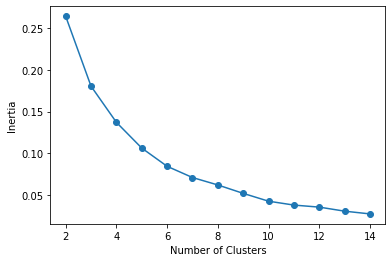

In [ ]:
#Plotting the inertia of the models    
#Here we can choose k = 8, using the elbow Method
k_values = range(2,15)
plt.plot(k_values, inertia, 'o-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

In [ ]:
k_model = KMeans(n_clusters=8).fit(locations_with_rest_coor[['lat','lon']])

In [ ]:
locations_with_rest_coor['cluster'] = k_model.predict(locations_with_rest_coor[['lat','lon']])

In [ ]:
input = [['choclate corn','bread butter','fruits'],'Kothnur, Bangalore, Karnataka, India']

In [ ]:
input_cuisines = find_existing_cuisines_from_input(input[0],model,list_of_overall_unique_cuisines)
input[0] = input_cuisines

In [ ]:
if len(input) !=0:
    df_recommends = recommend(unique_cuisines_for_each_rest,input)
    if df_recommends.empty:
        df_final_recommends=None
        print("No Recommendations found for the following input cuisines: ",input[0])
    else:
        input_location = input[1]
        input_location_coor = calculate_user_geo_location(input_location,geolocator)
        df_final_recommends = recommend_nearest_restaurants(locations_with_rest_coor,df_recommends,input_location_coor,k_model)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
df_final_recommends

,restaurant,restaurant_ratings,present_cuisines_count,present_cuisines,location
44,Energy Addaa,4.20,6,"[sandwich, pizza, desserts, juices, healthy fo...",Basavanagudi
674,Sunny's,3.96,6,"[fast food, sandwich, seafood, juices, salad, ...",Lavelle Road
350,Enerjuvate Studio & Cafe,4.34,5,"[sandwich, pizza, desserts, healthy food, salad]",Jayanagar
484,Ice N Fries Cafe,3.77,5,"[fast food, sandwich, pizza, desserts, ice cream]",Sarjapur Road
512,Juice Berg,3.75,4,"[fast food, desserts, juices, bakery]",Sarjapur Road
...,...,...,...,...,...
684,Mel's Korner,3.75,1,[fast food],Church Street
681,Somilan Steak House,4.30,1,[steak],Church Street
679,The Bangalore Cafe,4.18,1,[pizza],Shanti Nagar
678,Bootlegger,4.08,1,[steak],Lavelle Road


In [ ]:
df_final_recommends